# Analyzing Portfolio Risk and Return

Quantitative analysis for a FinTech investing platform. This platform aims to offer clients a one-stop online investment solution for their retirement portfolios that’s both inexpensive and high quality (similar provider as [Wealthfront](https://www.wealthfront.com/) or [Betterment](https://www.betterment.com/)). To keep the costs low, the firm uses algorithms to build each client's portfolio. The algorithms choose from various investment styles and options.

This analysis evaluates four new investment options for inclusion in the client portfolios. The analysis determines the fund with the most investment potential based on key risk-management metrics: daily returns, standard deviations, correlations, Sharpe ratios, betas, and Treynor ratios.

## Stages:

### I. Data load

1. Import the required libraries and dependencies.

2. Read the `whale_navs.csv` file into a Pandas DataFrame, and  creation of a datetime index. 

3. Calculate returns. DataFrame based on the NAV prices of the four funds and the closing price of the S&P 500 Index. 

### II. Quantitative Analysis

#### Profitability Analysis

Use daily, cumulative, and holding period returns, together with visulaizations to assess performance.


#### Volatility Analysis

Use box plots to analyze and compare the dispersion of daily returns among funds and stock market index.


#### Risk Analysis

Evaluate the risk profile of each fund by using standard deviation and beta. Analysis includes:

1. Annualization

2. Risk evolution using 21-day rolling standard deviations of returns

3. Determination of the more and less risky fund


#### Risk-Return Profile Analysis

1. Calculation of Sharpe and Treynor ratios for the funds and the S&P 500.

2. Visualization of Sharpe ratios in a bar chart.

3. Determination of the portfolio with the best and worst risk-return profile.

#### Diversification Analysis

Evaluation the funds' sensitivity relative to the broader market using rolling beta.

### III. Conclusions

* Recommendation of the selected fund for inclusion for the firm’s suite of fund offerings


## I. Data Load

In [48]:
# Import the required libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
import csv
import hvplot.pandas
%matplotlib inline


In [49]:
# Import the data by reading in the CSV file and setting the DatetimeIndex 
data=pd.read_csv(Path("Resources/whale_navs.csv"), index_col="date", parse_dates=True, infer_datetime_format=True)

# Review the first 5 rows of the DataFrame
data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


In [50]:
# Start and end of the holding period
start_holding_period=data.index[0].date()
end_holding_period=data.index[-1].date()

In [51]:
# Prepare for the coming analysis by converting the dataframe of NAVs and prices to daily returns
# Drop any rows with missing values
daily_returns=data.pct_change().dropna()

# Review the first five rows of the daily returns DataFrame.
daily_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


---

## II. Quantative Analysis

The analysis has several components: profitability, volatility, risk, risk-return profile, and portfolio diversification. Components will be analyzed one at a time.

###  Profitability Analysis

Cummulative returns are plotted to contrast portfolio performance with the broader stock market represented by the S&P 500.

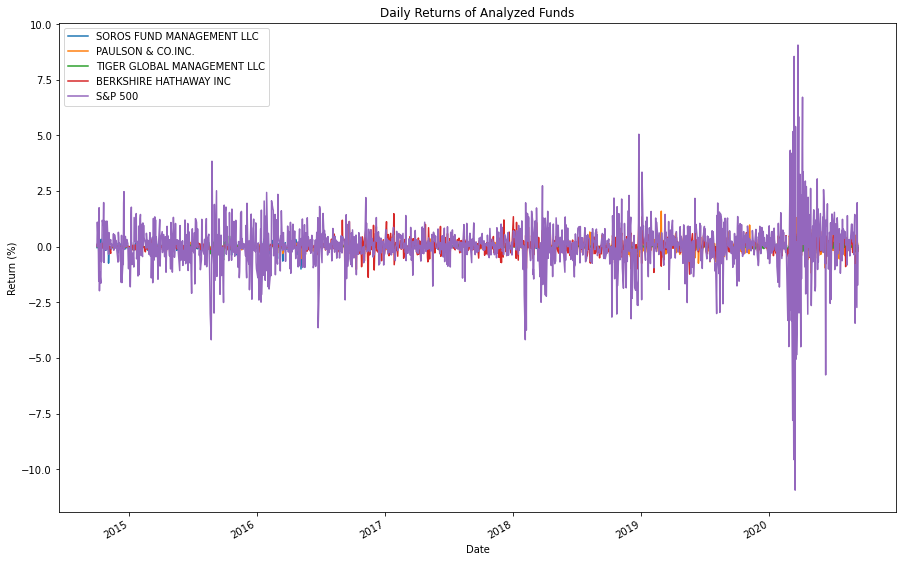

In [52]:
# First: visualization of the returns
# Plot daily return data of the 4 funds and the S&P 500 -  using matplotlib
(100*daily_returns).plot(
    title="Daily Returns of Analyzed Funds", 
    figsize=(15,10),
    xlabel="Date",
    ylabel="Return (%)"
);


In [53]:
# Plot daily return data of the 4 funds and the S&P 500 -- using hvPlot, which allows interaction with the graph, 
# like visualizing a set of timeseries and hiding others, or zooming into a period
(100*daily_returns).hvplot(
    title="Daily Returns of Analyzed Funds",
    xlabel="Date",
    ylabel="Return (%)",
    width=1200,
    height=500
)

:NdOverlay   [Variable]
   :Curve   [date]   (value)

In [54]:
# Second calculation of cummulative returns, as the growth of $1 dollar investment at the beggining of the period
# Calculate the cumulative returns of the 4 fund portfolios and the S&P 500
cummulative_returns=(1+daily_returns).cumprod()

# Review the last 5 rows of the cumulative returns DataFrame
cummulative_returns.tail()

# This cummulative return is showing the growth of the investment of 1 dolar at the beggining of the period. 
# To know the Holding Period Return, we must substract 1 from the growth in the table.

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,0.987355,0.958187,1.055714,1.244856,1.762645
2020-09-08,0.985640,0.956378,1.054373,1.238608,1.714484
2020-09-09,0.986739,0.958409,1.057221,1.240858,1.748341
2020-09-10,0.985498,0.959740,1.055539,1.237883,1.717983
2020-09-11,0.985086,0.957887,1.055081,1.236625,1.718858


In [55]:
# Calculation of the Holding Period Return
title=f"Holding Period Return of four Funds and the S&P 500 Index.                                                  Period: {start_holding_period} : {end_holding_period}"

holding_period_return=cummulative_returns.tail(1)-1

(100*holding_period_return).hvplot(
    kind='bar',
    width=1200, height=500,
    title=title,
    ylabel="Holding Period Return (%)",
    grid=True
)

:Bars   [date,Variable]   (value)

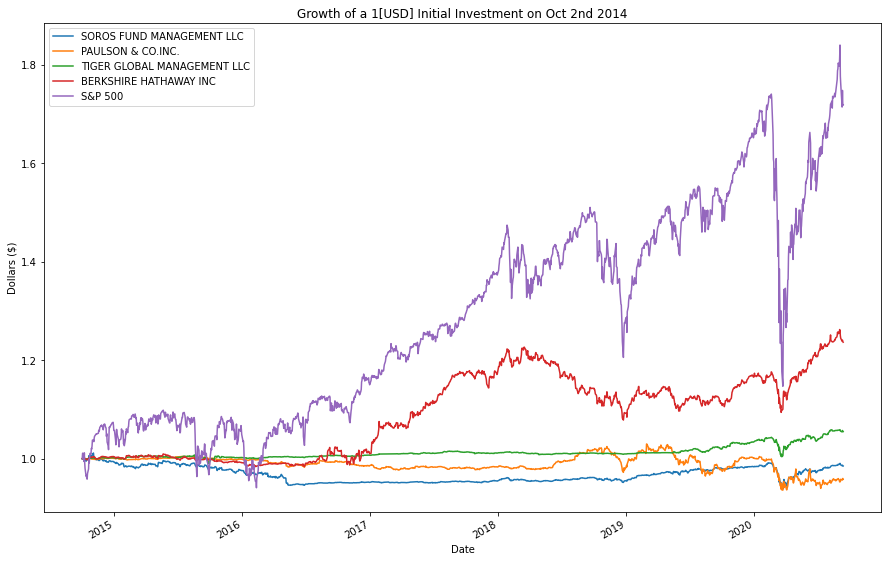

In [56]:
# Visualize the cumulative returns using the Pandas plot function
cummulative_returns.plot(
    figsize=(15,10), 
    title= "Growth of a 1[USD] Initial Investment on Oct 2nd 2014",
    xlabel="Date",
    ylabel="Dollars ($)"
);

**Question of the analysis** Do any of the four fund portfolios outperform the S&P 500 Index?

**Answer** # Based on the holding period return and the growth of $1 invested, none of the funds is even close to outperform the index. The best performer was Berkshire Hathaway Inc. with a cumulative return of 23.66% over the period, whereas the S&P500 rented 71.89%, almost three times as much. Paulson and Soros loose money. Tiger had a very small retuns of 5%, but also very small volatility. So appear as a safe option.

---

### Volatility Analysis

Box Plots are applied to visualize the dispersion of each of the four fund portfolios and of the S&P 500 Index.

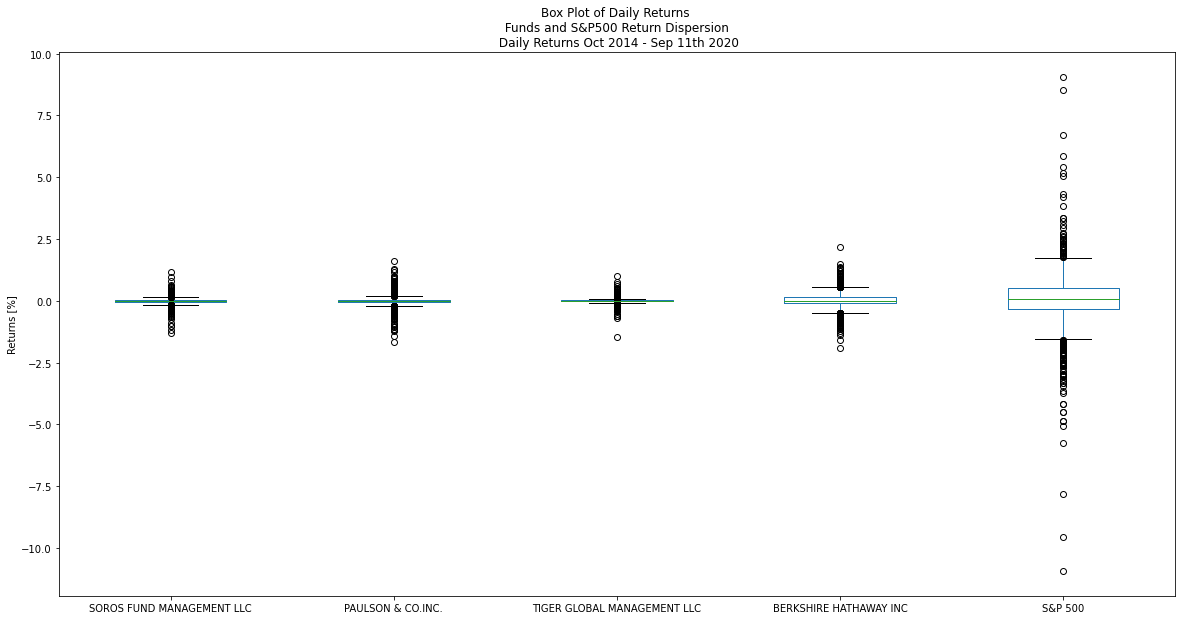

In [57]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
(100*daily_returns).plot(
    kind='box', 
    figsize=(20,10), 
    title="Box Plot of Daily Returns \n Funds and S&P500 Return Dispersion \n Daily Returns Oct 2014 - Sep 11th 2020",
    ylabel="Returns [%]"
);


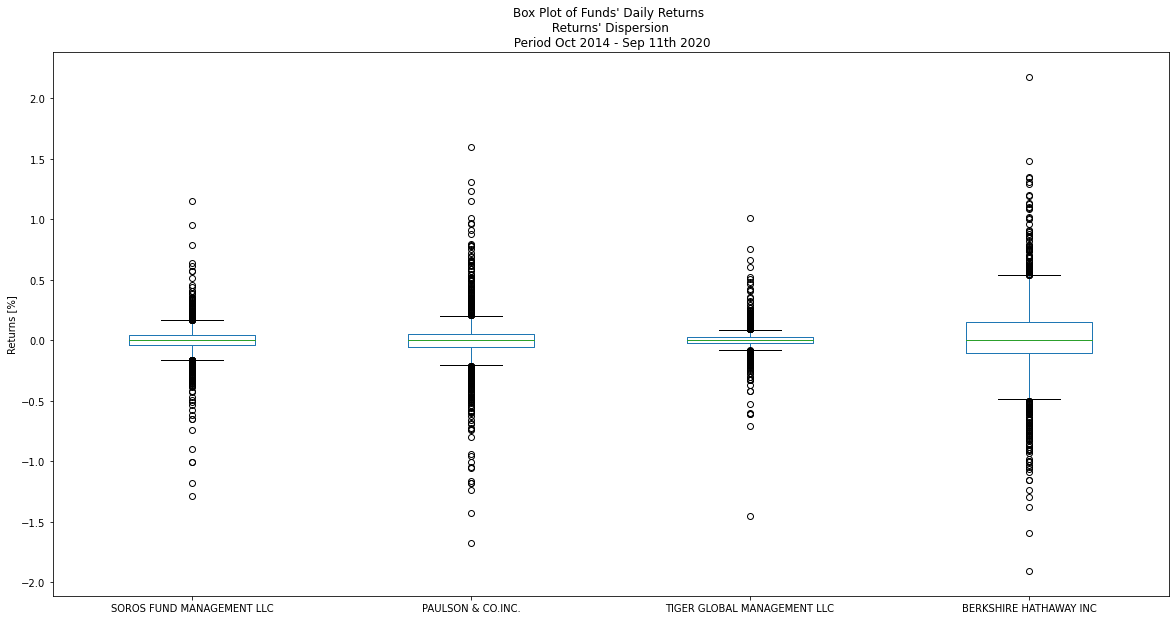

In [58]:
# Comparing dispersion of just the four funds

daily_returns_without_sp500=daily_returns.drop(columns="S&P 500")

(100*daily_returns_without_sp500).plot(
    kind='box', 
    figsize=(20,10), 
    title="Box Plot of Funds' Daily Returns \n Returns' Dispersion \n Period Oct 2014 - Sep 11th 2020",
    ylabel="Returns [%]"
);



**Question of the analysis** Based on the box plot visualization of the funds, which fund was the most volatile and which was the least volatile?

**Answer** # The more volatile was Berkshire Hathaway Inc, and the less volatile was tiger Global Management LLC.

---

### Risk Analysis

Evaluation of the risk profile of each portfolio by using *standard deviation* and *beta*.

In [59]:
# Standard deviation of daily returns and S&P 500
# (sorted smallest to largest)

daily_returns.std().sort_values()


TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

In [60]:
# Annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
# (sorted smallest to largest)

annualized_standard_deviation = daily_returns.std() * np.sqrt(252)
annualized_standard_deviation.sort_values()


TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

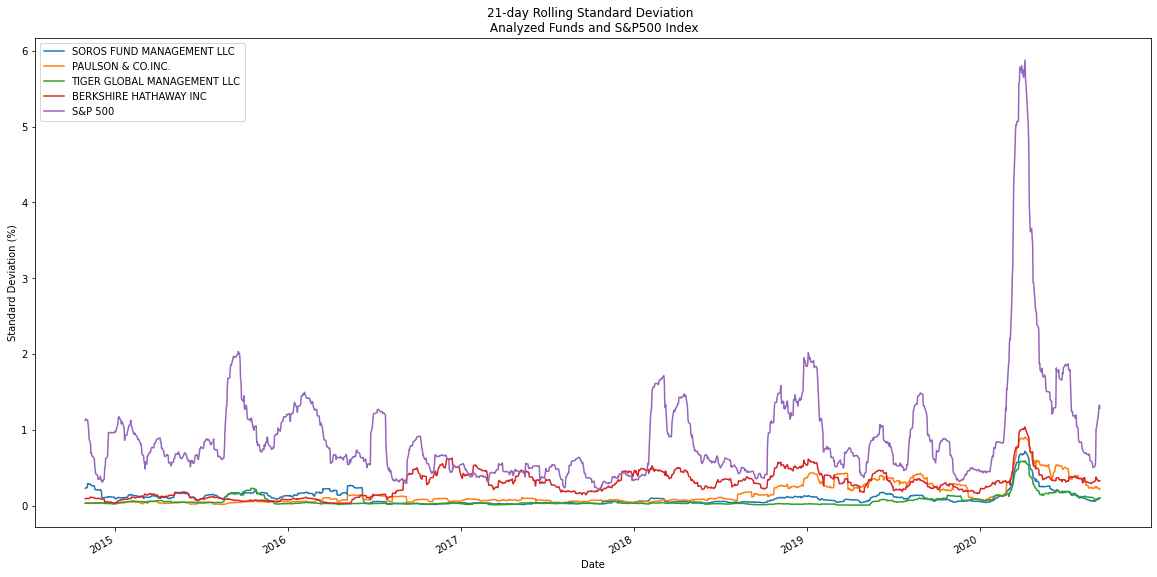

In [61]:
# Evolution of the standard deviation of daily returns (rolling standard deviation) in 21-day windows 
rolling_21_standard_deviation_of_daily_returns=daily_returns.rolling(21).std().dropna()

# Plot the rolling standard deviation of the 4 portfolios and the S&P 500
ax=(100*rolling_21_standard_deviation_of_daily_returns).plot(
    title="21-day Rolling Standard Deviation \n Analyzed Funds and S&P500 Index", 
    figsize=(20,10),
    xlabel="Date",
    ylabel= "Standard Deviation (%)"
);


In [62]:
# Plotting the rolling standard deviation of just the 4 funds in hvplot to allow more interaction. 
(100*rolling_21_standard_deviation_of_daily_returns).iloc[:,0:4].hvplot(
    title="21-day Rolling Standard Deviation od Daily Returns", 
    #figsize=(20,10),
    xlabel="Date",
    ylabel="Standard Deviation (%)",
    width=1200,
    height=500
)
     


:NdOverlay   [Variable]
   :Curve   [date]   (value)

#### **Questions related to this analysis**

**Question 1**  Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

**Answer 1** None of them. The S&P500 has more risk than any of the analized funds. There was a little period of 2017 when Berkshire showed a slightly higher volatility than the S&P 500.

**Question 2** Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

**Answer 2**  On the biggest spike of March 2020, it does for all funds, but not all along the period. There is some level of correlation, but do not appear to be so high. The one that appear increasing at the same time than the S&P 500 more closely, but in a much smaller scale, is Soros Fund Management LLC. Hathaway, even though it has more volatility, it presents higher volatilities in times when the S&P 500 shows its smallest one in 2017, and then it keeps that level with some increases similar to the S&P 500 but reduced in value. Paulson moves from lower volatility to a higher level at the end of 2018, which is different than the S&P 500. Tiger do not appear moving with the market, either, with a volatility that appear very constant and low during the whole period, with some increase since middle 2019.

**Question 3** Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time? 

**Answer 3** Berkshire Hataway Inc. appears to be the riskier. However, it is not always that way along the period. Before the middle of 2016, Soros and at times Tiger presented higer level of volatility as well. Also, starting 2019 up to the end of the period, Paulson appear as volatile as Berkshire, and sometimes even more.

---

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio.

In [63]:
# Calculate the annual average return data for the for fund portfolios and the S&P 500
# Use 252 as the number of trading days in the year
# Annual average returns sorted from lowest to highest
annualized_average_return=daily_returns.mean()*252
annualized_average_return.sort_values()


PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

In [64]:
# Calculate the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
# Review the Sharpe ratios sorted lowest to highest
# Since risk free rate have been very low in the analized period, we approximate it as zero
risk_free_rate=0
annualized_sharpe = annualized_average_return / annualized_standard_deviation
annualized_sharpe.sort_values()


PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64

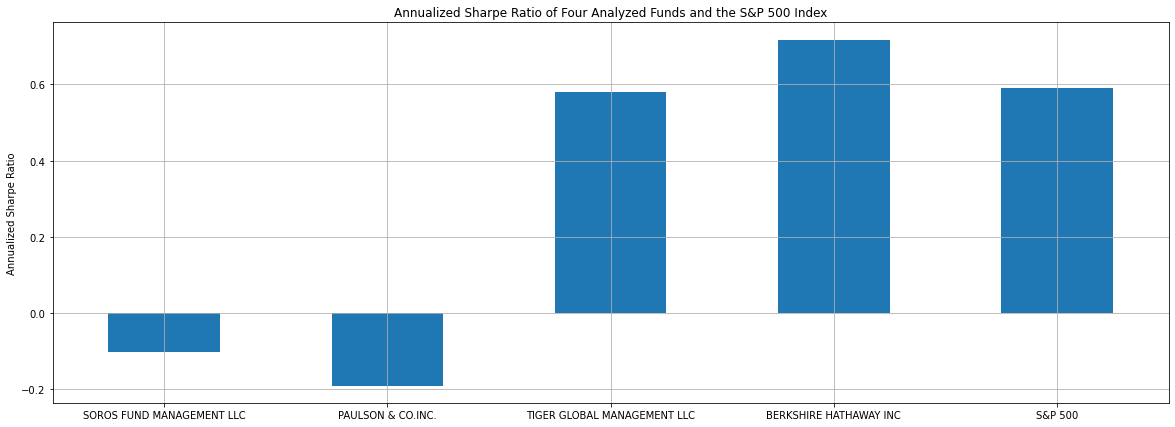

In [65]:
# Visualize the Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size
annualized_sharpe.plot.bar(
    title="Annualized Sharpe Ratio of Four Analyzed Funds and the S&P 500 Index", grid=True, figsize=(20,7), 
    rot=0,
    ylabel="Annualized Sharpe Ratio"
);


In [66]:
# Possible Candidates must have a positive Sharpe Ratio (unless very special circunstances of diversification  benefit 
# which is not the case due to correlations that will be calculated later.)

# Subset to analize going forward
candidate_funds=annualized_sharpe[(annualized_sharpe>0) & (annualized_sharpe.index!="S&P 500")].index
candidate_funds_and_sp=candidate_funds.insert(len(candidate_funds),"S&P 500")



**Question** Which of the four portfolios offers the best risk-return profile? Which offers the worst?
    
**Answer** The best risk/return profile is provided by the Berkshire Hathaway, with an annualized Sharpe ratio of 0.71. The worse is provided by Paulson & Co Inc., with an annualized Sharpe Ratio of -0.19. The Sharpe ratio is a measure of return adjusted by risk, above the risk free rate, which we have dismissed since it is very close to 0 since 2008. The higher the Sharpe ratio, the better the risk return profile. A negative Sharpe ratio means that the fund didn't rent more than treasury bills over the period. That takes Soros and Paulson out of the game. Only Tiger and Berkshire worth consideration.


---

### Diversification Analysis
Evaluation of how the portfolios reacted relative to the broader market. Funds that are less correlated and less sensitive (lower beta) to the market provide better diversification, decreasing the risk of the client portfolios.

In [75]:
# Calculation of all correlations in a heatmap
correlations = daily_returns.corr()
correlations.hvplot.heatmap(
        width = 1300,
        cmap ='reds',
        title = "Correlation Matrix of all Funds and the S&P500 Index"
)

:HeatMap   [columns,index]   (value)

In [77]:
# Subset of correlations for candidates only
correlation_candidates = daily_returns[candidate_funds_and_sp].corr()
correlation_candidates.hvplot.heatmap(
        width = 1300,
        cmap ='reds',
        title = "Correlation Matrix of all Funds and the S&P500 Index"
)

:HeatMap   [columns,index]   (value)

The heatmap shows that Berkshire have less correlation with the market than Tiger Global.

In [22]:
# Calculate the variance of the S&P 500 using a rolling 60-day window.
sp_rolling_60_variance = daily_returns["S&P 500"].rolling(60).var().dropna()
sp_rolling_60_variance.tail()

date
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500, dtype: float64

#### For each of the candidate portfolios, these are the following steps to calculate betas and rolling betas:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, we calculate covariance. 

2. Calculate the beta of the portfolio. 

3. Calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. 

In [23]:
# Reduce analysis to two selected portfolio, plus S&P500
daily_returns=daily_returns.loc[:,candidate_funds_and_sp]

# Review of daily returns selection
daily_returns

,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,
2014-10-02,0.000013,0.000171,0.000154
2014-10-03,0.000394,0.001248,0.011009
2014-10-06,0.000066,0.000267,-0.001170
2014-10-07,-0.000208,-0.000587,-0.015436
2014-10-08,0.000242,0.000842,0.017489
...,...,...,...
2020-09-04,-0.000653,-0.003985,-0.008165
2020-09-08,-0.001270,-0.005019,-0.027323
2020-09-09,0.002701,0.001817,0.019747


In [42]:
# Covariance matrices of 60-day window calculations
# I will use covariance matrices, because it is more scalable when
# analizing several portfolios or stocks for beta calculations

# For each date below you will see the 60-day window covariance matrix, which is:
# Var(TIGER)             COV (TIGER, BERKSHIRE)      COV(TIGER, S&P500)
# COV(BERKSHIRE, TIGER)  VAR (BERKSHIRE)             COV(BERKSHIRE, S6P500)
# COV(S&P500, TIGER)     COV(S&P 500, BERKSHIRE)     VAR(S&P500)

# As you can see, we only need the last column of this matrix in order 
# to have all covariances for the calculation of betas

covariance_rolling_60=daily_returns.rolling(60).cov().dropna()
covariance_rolling_60.tail(10)

TIGER GLOBAL MANAGEMENT LLC  \
date                                                                  
2020-09-08 S&P 500                                         0.000009   
2020-09-09 TIGER GLOBAL MANAGEMENT LLC                     0.000002   
           BERKSHIRE HATHAWAY INC                          0.000002   
           S&P 500                                         0.000010   
2020-09-10 TIGER GLOBAL MANAGEMENT LLC                     0.000002   
           BERKSHIRE HATHAWAY INC                          0.000002   
           S&P 500                                         0.000010   
2020-09-11 TIGER GLOBAL MANAGEMENT LLC                     0.000002   
           BERKSHIRE HATHAWAY INC                          0.000002   
           S&P 500                                         0.000010   

                                        BERKSHIRE HATHAWAY INC   S&P 500  
date                                                                      
2020-09-08 S&P 500                                    0.000023  0.000116  
2020-09-09 TIGER GLOBAL MANAGEMENT LLC                0.000002  0.000010  
           BERKSHIRE HATHAWAY INC                     0.000012  0.000024  
           S&P 500                                    0.000024  0.000120  
2020-09-10 TIGER GLOBAL MANAGEMENT LLC                0.000002  0.000010  
           BERKSHIRE HATHAWAY INC                     0.000012  0.000024  
           S&P 500                                    0.000024  0.000121  
2020-09-11 TIGER GLOBAL MANAGEMENT LLC                0.000002  0.000010  
           BERKSHIRE HATHAWAY INC                     0.000012  0.000024  
           S&P 500                                    0.000024  0.000120

In [25]:
# Rolling 60-day covariances of BERKSHIRE and TIGER funds in relation to the S&P 500, 
# plus S&P 60-day rolling window variance
covariance_with_sp500_rolling60_df=covariance_rolling_60['S&P 500'].unstack()

# Review of last 5 rows
covariance_with_sp500_rolling60_df.tail()

,BERKSHIRE HATHAWAY INC,S&P 500,TIGER GLOBAL MANAGEMENT LLC
date,,,
2020-09-04,0.000021,0.000103,0.000008
2020-09-08,0.000023,0.000116,0.000009
2020-09-09,0.000024,0.000120,0.000010
2020-09-10,0.000024,0.000121,0.000010
2020-09-11,0.000024,0.000120,0.000010


In [26]:
# Beta calculations
beta_rolling_60 = covariance_with_sp500_rolling60_df.div(sp_rolling_60_variance, axis=0) 

# Review of last 5 rows
beta_rolling_60

#Obs: the beta for the S&P 500==1 helps in corroborate the correct calculation


,BERKSHIRE HATHAWAY INC,S&P 500,TIGER GLOBAL MANAGEMENT LLC
date,,,
2014-12-26,0.046920,1.0,0.017361
2014-12-29,0.046960,1.0,0.017362
2014-12-30,0.045166,1.0,0.016998
2014-12-31,0.045679,1.0,0.017557
2015-01-02,0.046140,1.0,0.017759
...,...,...,...
2020-09-04,0.207879,1.0,0.081061
2020-09-08,0.203051,1.0,0.076672
2020-09-09,0.196632,1.0,0.079575


In [27]:
# Calculate the average of the 60-day rolling beta for the candidate funds
average_60_day_rolling=beta_rolling_60.drop(columns="S&P 500").mean()
average_60_day_rolling

BERKSHIRE HATHAWAY INC         0.221499
TIGER GLOBAL MANAGEMENT LLC    0.030930
dtype: float64

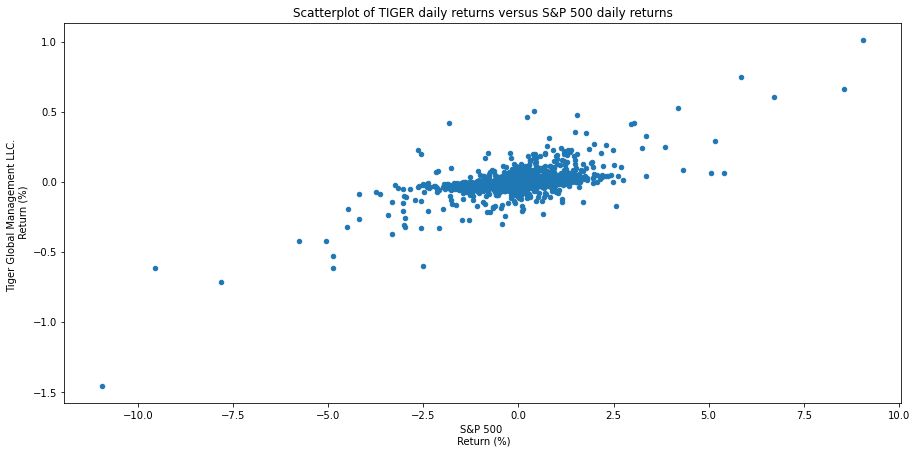

In [28]:
# Scatter plot of returns for TIGER
(100*daily_returns).loc[:, ["TIGER GLOBAL MANAGEMENT LLC", "S&P 500"]].plot(
            kind='scatter',
            x="S&P 500", 
            y="TIGER GLOBAL MANAGEMENT LLC", 
            title="Scatterplot of TIGER daily returns versus S&P 500 daily returns",
            xlabel="S&P 500 \n Return (%)",
            ylabel="Tiger Global Management LLC. \n Return (%)",
            figsize=(15,7)
);


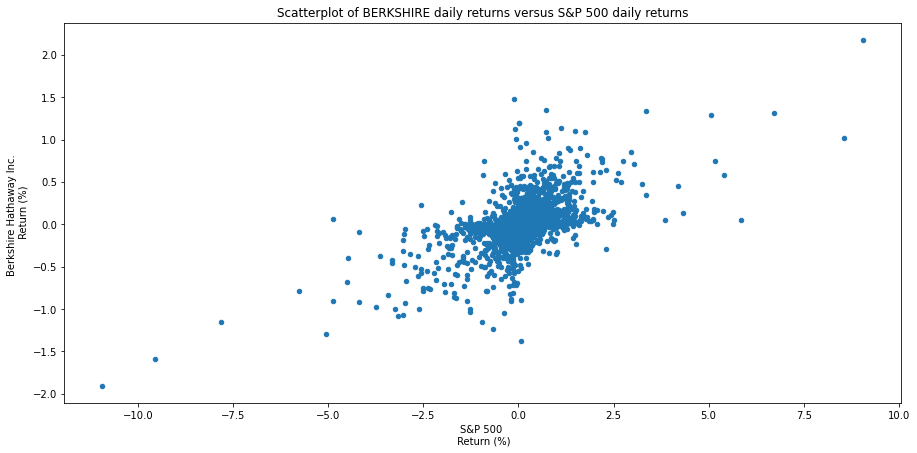

In [29]:
# Scatter plot of returns for BERKSHIRE
(100*daily_returns).loc[:, ["BERKSHIRE HATHAWAY INC", "S&P 500"]].plot(
        kind='scatter',
        x="S&P 500", 
        y="BERKSHIRE HATHAWAY INC",
        title="Scatterplot of BERKSHIRE daily returns versus S&P 500 daily returns",
        xlabel="S&P 500 \n Return (%)",
        ylabel="Berkshire Hathaway Inc. \n Return (%)",
        figsize=(15,7)
);

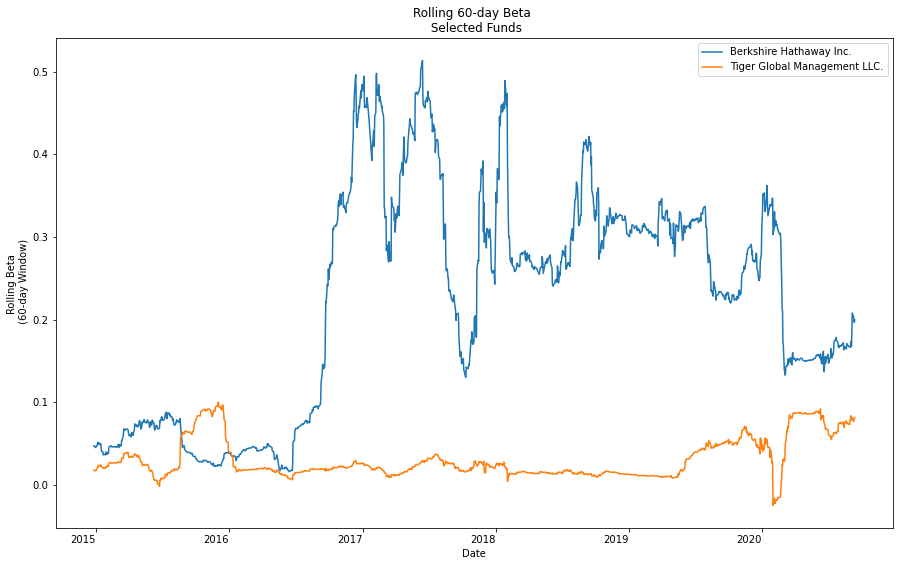

In [30]:
# Plotting the rolling beta 
beta_rolling_60.loc[:,"BERKSHIRE HATHAWAY INC"].plot(
    legend=True, 
    title= "Rolling 60-day Beta \n Selected Funds", 
    figsize=(15,10),label="Berkshire Hathaway Inc."
);

beta_rolling_60.loc[:,"TIGER GLOBAL MANAGEMENT LLC"].plot(
    legend=True, 
    label="Tiger Global Management LLC.",
    ylabel= "Rolling Beta \n (60-day Window)",
    xlabel="Date",
    rot=0
);




**Question for the anaysis** Which of the two portfolios seem more sensitive to movements in the S&P 500?
    
**Answer** # Giving the information of beta, since middle 2016 Berkshire Hathaway is more sensitive to the market, with a beta that is several times the one of Tiger. However, the beta of Berkshire is considerable under 1. Most of the time under 0.5. So, eventhough the size is larger for Berkshire, still both investment would be considered low risk under the beta analysis.

In [43]:
# Treynor Ratio to assess returns adjusted by beta
# treynor_ratio = (annualized_average_return - risk free rate) / beta
covariance = daily_returns.cov()["S&P 500"]
beta = covariance/covariance["S&P 500"]
treynor_ratio = (annualized_average_return[candidate_funds_and_sp] - risk_free_rate)/beta
#beta
#treynor_ratio

In [32]:
# Plot to compare beta, Sharpe ratio, and Treynor ratio between the two candidates
beta_and_ratios={"Beta":beta
                 ,"Market Correlation":correlation_candidates["S&P 500"]
                 ,"Sharpe Ratio":annualized_sharpe[candidate_funds_and_sp]
                 ,"Treynor Ratio":treynor_ratio} 
beta_and_ratios_df=pd.DataFrame(beta_and_ratios)
beta_and_ratios_df=beta_and_ratios_df.T
beta_and_ratios_df

,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
Beta,0.057021,0.171443,1.000000
Market Correlation,0.661494,0.608083,1.000000
Sharpe Ratio,0.579002,0.717512,0.589612
Treynor Ratio,0.160481,0.216339,0.108102


In [36]:
beta_and_ratios_df.hvplot(
    kind="bar",
    invert =True,
    title= "Contrast Between Risk Measurements for Candidate Funds and Market Index",
    width=1000,
    height=500
    )

:Bars   [index,Variable]   (value)

## III. Conclusions

I recommend to include in the suite of the company portfolios the fund Berkshire Hathaway Inc because provide better return versus risk characteristics, and is suitable for retirement portfolios. Specifically: 

>    1) Both candidate funds have a good response in times of market crushess, and this set an advantage to Berkshire, since that funds is more volatile and then we would expect a worse performance in times of large market drops. Evidence of this can be oberved in the graph "Growth of a 1[USD] Initial Investment on Oct 2nd 2014". There we can see that Berkshire and Tiger fell by a relatively similar and small amount at times when the market drop at the end of 2018, and beggining of 2020. 

>    2) Berkshire has a better performance adjusted by risk as can be seen in a higher Sharpe ratio (0.71 against 0.57 of Tiger). This means that even though Berkshire has more volatility, it has much better performance, so the extra risk that Berkshire embrace worth it (Berkshire returned 23.7% against 5.5% of Tiger in the almost 6-year period analyzed.)

>    3) Berkshire has a better performance adjusted by Beta than Tiger, with a Treynor ratio of 0.22 for Berkshire and 0.16 for Tiger. Another reason to choose Berkshire. 

>    4) The correlation of Bershire with the market is 0.60, which is less than the correlation of Tiger with the market of 0.66. This also corroborates that Berkshire is the best option, since it will provide additionally a better source of diversification with the market. 

>    5) The selection should be of high investment potential, and suitable for retirement portfolios. We have assessed the performance and performance adjusted by risk potential. We should also assess that the level of risk is low. We can confirm this considering the low rolling 60 day beta of equal or less than 0.5 along the period, and 0.17 in the full period; and considering that the annualized volatility of the fund is just 5%, which is less than a third of the volatility of the equity market represented by the S&P 500 of 18%. The fund is suitable for inclusion.

In conclusion, Berkshire Hathaway Inc is the best option to be included in the firm's suite of fund offeing for retirement funds, because it has low risk, a good response to market drops, the best measurements of performance adjusted by risk, and offer the best diversification benefits given the lower correlation with the equity market.
